# Reading and preprocessing the dataset
*Ana Maria Sousa, Mariana Xavier, Rui Santos*

This notebook reads the full dataset from the folder "dataset", applies the filters for preprocessing and uses the short time fourier transform (stft) to transform the signals into the frequency domain.



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
"""
Read and preprocess the training set.
"""

import os
import scipy.io
import numpy as np
from scipy import signal
from scipy.signal import stft
from math import ceil

# Run the training dir.
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset/train'):
       
  # Read each of the files.
  for filename in filenames:
    print(filename)
      
    # Load the data from each file.
    data = scipy.io.loadmat(os.path.join(dirname, filename))
           
    # Get the field corresponding to the segments.
    train_data = data.get(list(data.keys())[3])
            
    # Get in a separate array the values of EEG for the different channels.
    data = train_data['data'][0][0]

    # Get the sampling frequency.
    sampling_frequency = ceil(train_data['sampling_frequency'][0][0][0][0])

    # Considering all the different channels as representative of the EEG.
    for channel in range (data.shape[0]):
          
        # Filter the data.
        sig=data[channel] 
        sos = signal.butter(12, [59,61], 'bandstop', fs=sampling_frequency, output='sos')
        sig = signal.sosfilt(sos, data[channel])
        sos = signal.butter(5, 0.5, 'highpass', fs=sampling_frequency, output='sos')
        sig = signal.sosfilt(sos, sig)
        sos = signal.butter(1, 120, 'lowpass', fs=sampling_frequency, output='sos')
        sig = signal.sosfilt(sos, sig)

        # Apply the stft transform.
        _,_,ft = stft(sig,fs=sampling_frequency,nperseg=sampling_frequency*30,noverlap=0)
        ft = np.abs(ft[:3601,:])

        # Save the files in format .npy
        np.save('/content/drive/MyDrive/stft12020/train/' + filename[:len(filename)-4] + '_channel_' + str(channel) + '.npy', ft)

print("Training set read and stft successfully applied.")

In [ ]:
"""
Read and preprocess the test set.
"""

import os
import scipy.io
import numpy as np
from scipy import signal
from scipy.signal import stft
from math import ceil

# Run the training dir.
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset/test'):
       
  # Read each of the files.
  for filename in filenames:
    print(filename)
      
    # Load the data from each file.
    data = scipy.io.loadmat(os.path.join(dirname, filename))
           
    # Get the field corresponding to the segments.
    test_data = data.get(list(data.keys())[3])
            
    # Get in a separate array the values of EEG for the different channels.
    data = test_data['data'][0][0]

    # Get the sampling frequency.
    sampling_frequency = ceil(test_data['sampling_frequency'][0][0][0][0])

    # Considering all the different channels as representative of the EEG.
    for channel in range (data.shape[0]):
          
        # Filter the data.
        sig=data[channel] 
        sos = signal.butter(12, [59,61], 'bandstop', fs=sampling_frequency, output='sos')
        sig = signal.sosfilt(sos, data[channel])
        sos = signal.butter(5, 0.5, 'highpass', fs=sampling_frequency, output='sos')
        sig = signal.sosfilt(sos, sig)
        sos = signal.butter(1, 120, 'lowpass', fs=sampling_frequency, output='sos')
        sig = signal.sosfilt(sos, sig)

        # Apply the stft transform.
        _,_,ft = stft(sig,fs=sampling_frequency,nperseg=sampling_frequency*30,noverlap=0)
        ft = np.abs(ft[:3601,:])

        # Save the files in format .npy
        np.save('/content/drive/MyDrive/stft12020/test/' + filename[:len(filename)-4] + '_channel_' + str(channel) + '.npy', ft)

print("Test set read and stft successfully applied.")

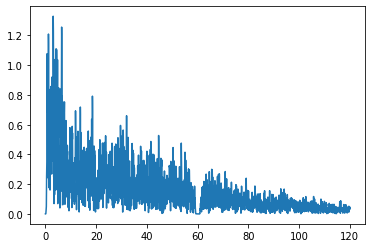

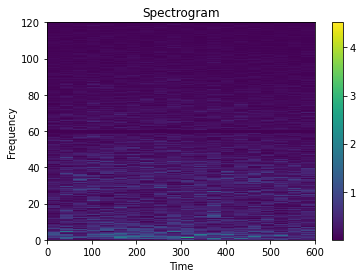

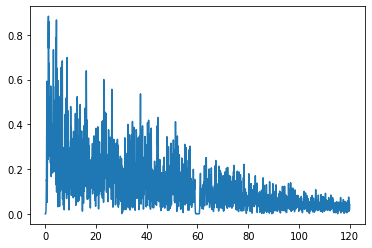

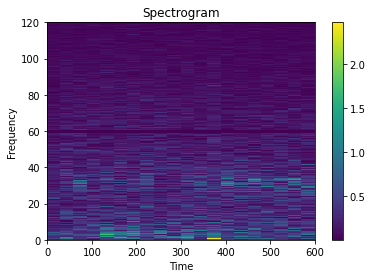

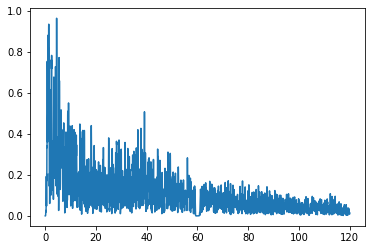

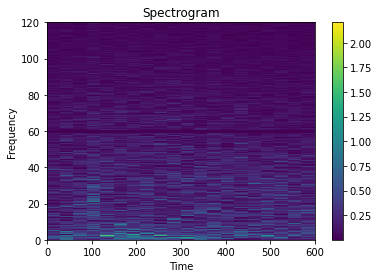

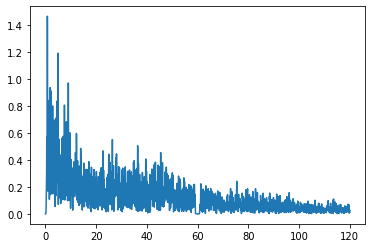

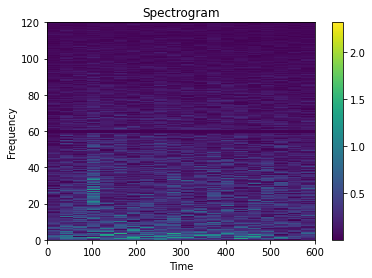

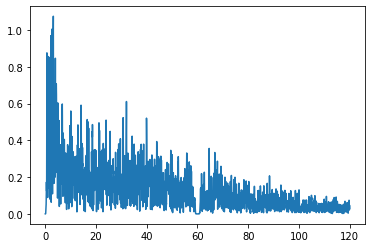

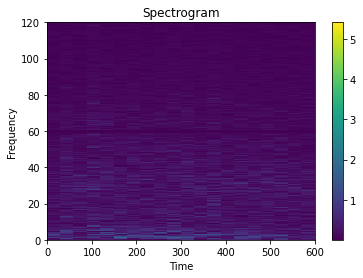

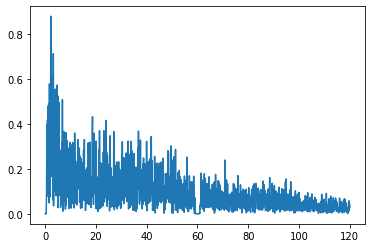

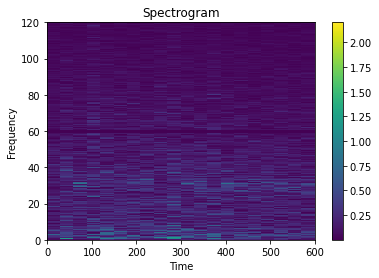

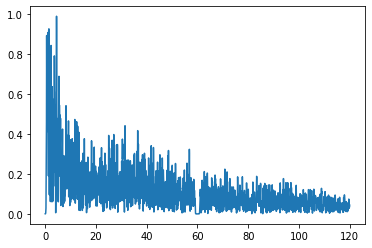

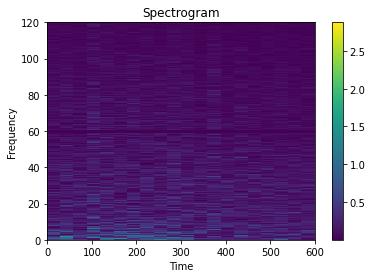

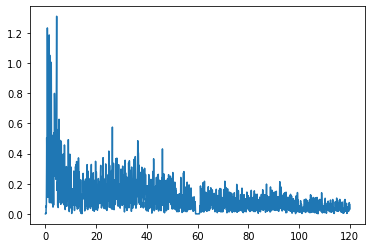

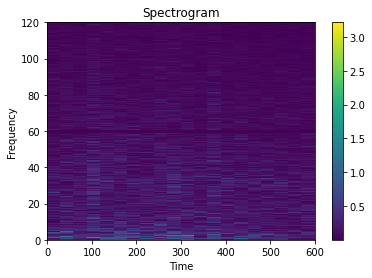

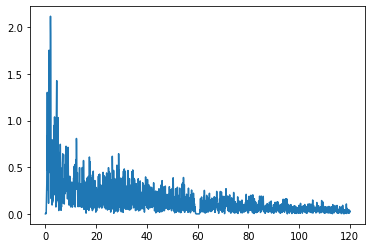

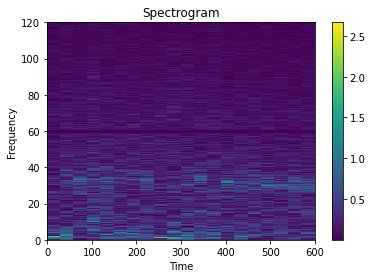

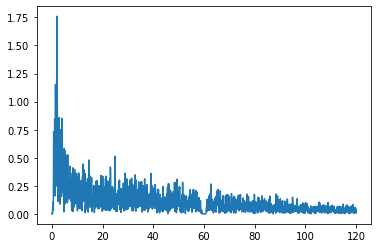

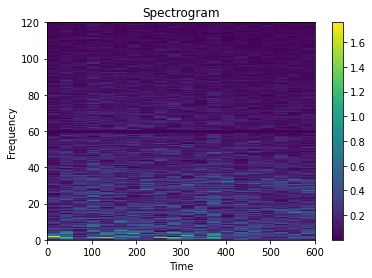

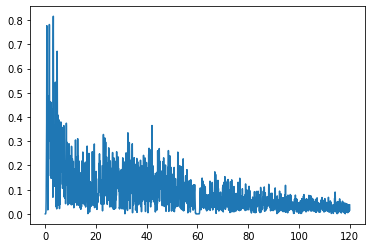

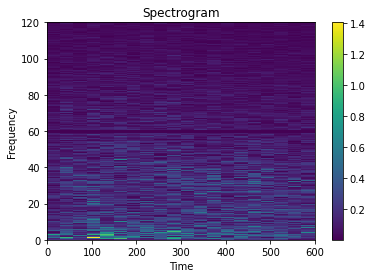

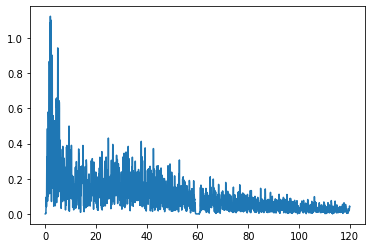

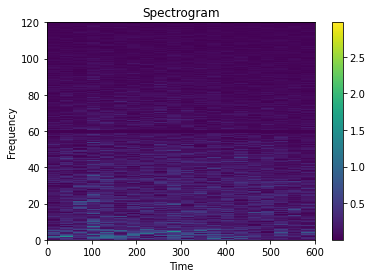

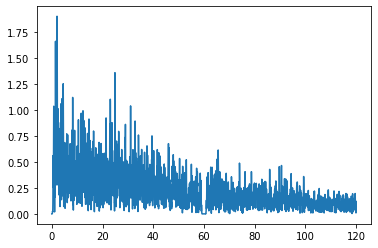

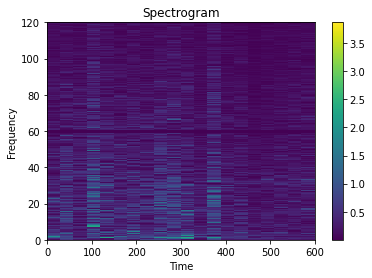

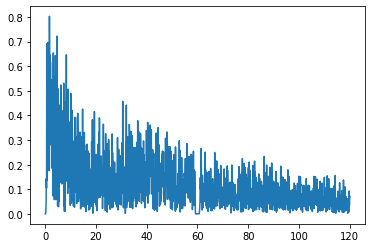

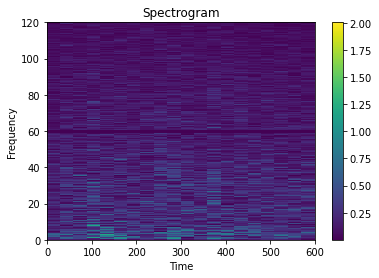

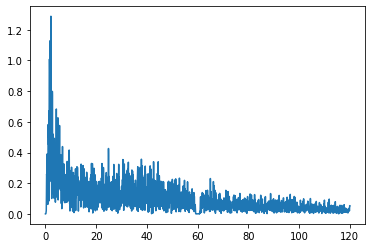

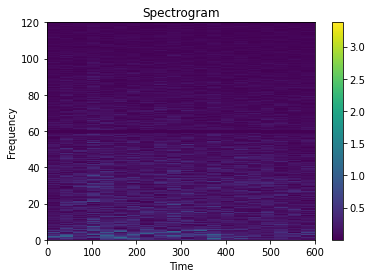

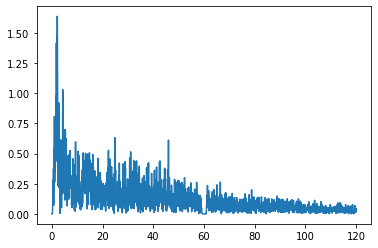

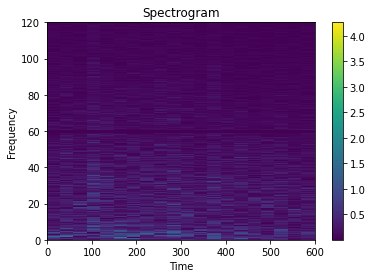

In [ ]:
"""
Example of reading, preprocessing and plotting one signal.
"""

from scipy.signal import stft
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.fft import rfftfreq
from math import ceil

data = scipy.io.loadmat('/content/drive/MyDrive/dataset/train/Dog_1_preictal_segment_0001.mat')
           
train_data = data.get(list(data.keys())[3])
            
data = train_data['data'][0][0]
sampling_frequency = ceil(train_data['sampling_frequency'][0][0][0][0])
    
for channel in range(data.shape[0]):

    sig=data[channel] 
    sos = signal.butter(12, [59,61], 'bandstop', fs=sampling_frequency, output='sos')
    sig = signal.sosfilt(sos, sig)
    sos = signal.butter(5, 0.5, 'highpass', fs=sampling_frequency, output='sos')
    sig = signal.sosfilt(sos, sig)
    sos = signal.butter(1, 120, 'lowpass', fs=sampling_frequency, output='sos')
    sig = signal.sosfilt(sos, sig)

    f,t,ft = stft(sig,fs=sampling_frequency,nperseg=sampling_frequency*30,noverlap=0)

    ft = np.abs(ft)
    xf = rfftfreq(sampling_frequency*30,1/sampling_frequency)
    
    plt.figure()
    plt.plot(xf[:3601],ft[:3601,0])
    plt.show()

    plt.figure()
    plt.pcolormesh(t,f[:3601],ft[:3601,:])
    plt.title('Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.colorbar()
    plt.show()